In [1]:
import numpy as np 
import pandas as pd  
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, roc_auc_score, roc_curve, 
                             matthews_corrcoef, log_loss)
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import re
from itertools import product
import time
from sklearn.ensemble import VotingClassifier
from tqdm import tqdm
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import precision_score, recall_score, f1_score

Try Phising Email Dataset

In [2]:
df = pd.read_csv('../Dataset/phishing_email.csv')

In [3]:
df.head()

,text_combined,label
0,hpl nom may 25 2001 see attached file hplno 52...,0
1,nom actual vols 24 th forwarded sabrae zajac h...,0
2,enron actuals march 30 april 1 201 estimated a...,0
3,hpl nom may 30 2001 see attached file hplno 53...,0
4,hpl nom june 1 2001 see attached file hplno 60...,0


- Text Combined: full text data email (subject, body, date, sender email)
- Label 1 = phising, 0 = not

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82486 entries, 0 to 82485
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text_combined  82486 non-null  object
 1   label          82486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [11]:
print(df.isnull().sum())

text_combined    0
label            0
dtype: int64


label
1    42891
0    39595
Name: count, dtype: int64


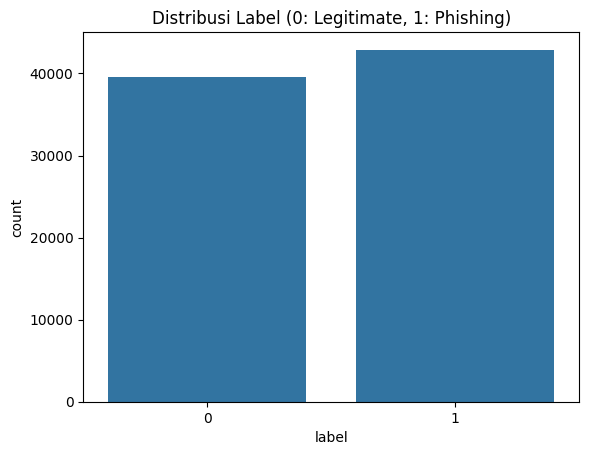

In [12]:
print(df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.title("Distribusi Label (0: Legitimate, 1: Phishing)");

<Axes: xlabel='label', ylabel='text_length'>

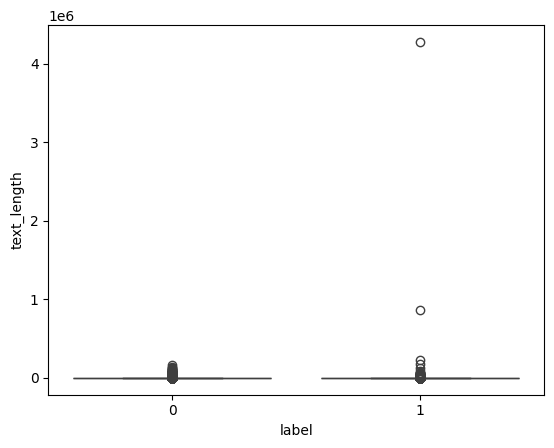

In [13]:
df['text_length'] = df['text_combined'].apply(len)
sns.boxplot(x='label', y='text_length', data=df)

In [14]:
# Balance Dataset 
print(df['label'].value_counts())
phishing_emails = df[df['label'] == 1]
non_phishing_emails = df[df['label'] == 0]

label
1    42891
0    39595
Name: count, dtype: int64
